In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '/home/ubuntu/seongyoon/PI/Impedance')
from impedancecircuit.models.circuit import Circuit

In [4]:
cellname = '25C01'
# Cell name list
# 25C01
# 25C02
# 25C03
# 25C04
# 25C05
# 25C06
# 25C07
# 25C08
# 35C01
# 35C02
# 45C01
# 45C02

datapath = './data/Cavendish/'

filename = f'{datapath}EIS_state_V_{cellname}.txt'

data = pd.read_csv(filename, delimiter='\t')
data.columns = data.columns.str.strip()

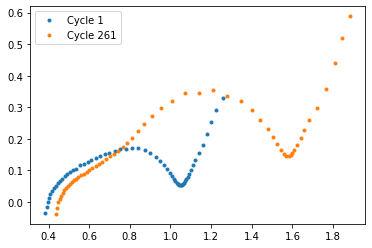

In [6]:
for cycle in [1, 261]:
    data_real = data[data['cycle number'] == cycle]['Re(Z)/Ohm']
    data_imag = data[data['cycle number'] == cycle]['-Im(Z)/Ohm']
    data_freq = data[data['cycle number'] == cycle]['freq/Hz']
    plt.plot(
        data_real,
        data_imag,
        '.', label=f'Cycle {cycle}'
    )
plt.legend()
plt.show()

['./data/Tongji/NCA battery/CY25_0.25_1.xlsx', './data/Tongji/NCA battery/CY25_0.5_1.xlsx', './data/Tongji/NCA battery/CY25_1_1.xlsx', './data/Tongji/NCA battery/CY35_0.5_1.xlsx', './data/Tongji/NCA battery/CY45_0.5_1.xlsx']


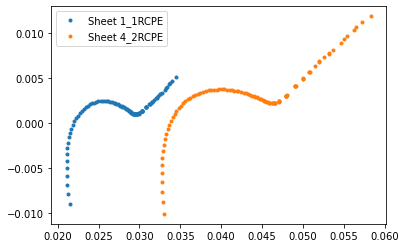

In [14]:
datapath = './data/Tongji/NCA battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[2]).sheet_names
for sheet in [sheet_names[0], sheet_names[3]]:
    data = pd.read_excel(filename[2], sheet_name=sheet)
    data_real = data["Data: Z'"]
    data_imag = -data["Data: Z''"]
    data_freq = data["Data: Frequency"]
    plt.plot(
        data_real,
        data_imag,
        '.', label=f'Sheet {sheet}'
    )
plt.legend()
plt.show()

['./data/Tongji/NCM battery/CY25_0.5_1.xlsx', './data/Tongji/NCM battery/CY35_0.5_1.xlsx', './data/Tongji/NCM battery/CY45_0.5_1.xlsx']


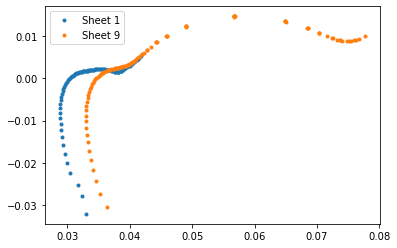

In [17]:
datapath = './data/Tongji/NCM battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[0]).sheet_names
for sheet in [sheet_names[0], sheet_names[8]]:
    data = pd.read_excel(filename[0], sheet_name=sheet)
    data_real = data["Data: Z'"]
    data_imag = -data["Data: Z''"]
    data_freq = data["Data: Frequency"]
    plt.plot(
        data_real,
        data_imag,
        '.', label=f'Sheet {sheet}'
    )
plt.legend()
plt.show()

/home/ubuntu/seongyoon/PI/Impedance/impedancecircuit/models/circuit.py:67: RuntimeWarning: overflow encountered in exp
  return 1./(1.+np.exp(-x))
/home/ubuntu/seongyoon/PI/Impedance/impedancecircuit/models/elements.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Z = 1./(par[0]*(1j*omega)**par[1])
/home/ubuntu/seongyoon/PI/Impedance/impedancecircuit/models/elements.py:47: RuntimeWarning: invalid value encountered in true_divide
  Z = 1./(par[0]*(1j*omega)**par[1])
/home/ubuntu/anaconda3/envs/yoomtorch/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


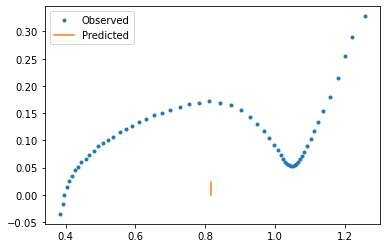

array([1.86463487e-07, 0.00000000e+00, 5.71591718e+02, 8.35889859e+09,
       9.78838967e+02, 3.58151721e+04, 6.90636060e+04, 4.44089210e-16,
       1.22576707e+00, 0.00000000e+00])

In [6]:
cellname = '25C01'
datapath = '../examples/data/Cavendish/'
filename = f'{datapath}EIS_state_V_{cellname}.txt'

data = pd.read_csv(filename, delimiter='\t')
data.columns = data.columns.str.strip()

cycle = 1
data_real = data[data['cycle number'] == cycle]['Re(Z)/Ohm'].values
data_imag = data[data['cycle number'] == cycle]['-Im(Z)/Ohm'].values
data_freq = data[data['cycle number'] == cycle]['freq/Hz'].values

impedance = np.concatenate([data_real, data_imag])

circuit_str = 'l-r-(r,cpe)-(r-cpe,cpe)'

custom_initial_guess = np.zeros(10)
custom_initial_guess[1] = np.log(np.exp(min(data_real)) - 1)
circuit = Circuit(circuit_str, custom_initial_guess)

circuit.fit(data_freq, impedance)
impedance_pred = circuit.predict(data_freq)

plt.plot(data_real, data_imag, '.', label='Observed')
plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '-', label='Predicted')
plt.legend()
plt.show()

def softplus(x):
    return np.log(1.+np.exp(-np.abs(x))) + np.maximum(x, 0)

softplus(circuit.parameters)